In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Arial 폰트 설정
plt.rcParams['font.family'] = 'Arial'

C:\Users\qkfeh\AppData\Local\Temp\ipykernel_24908\1687014348.py:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_boundaries = df.groupby('Group').apply(lambda d: (d.index[0] - 0.5, d.index[-1] + 0.5))


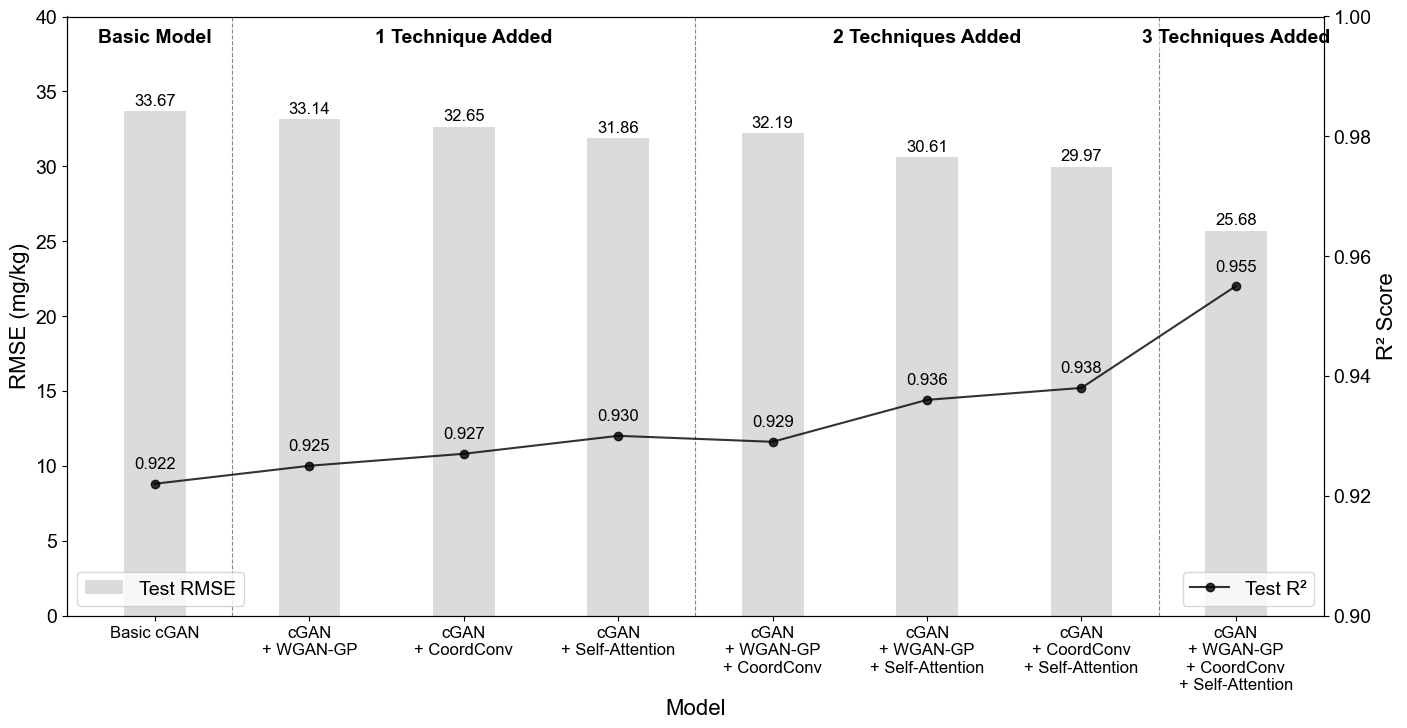

In [3]:
# 1. 데이터 준비 및 그룹 정의
data = {
    'Model': [
        'Basic cGAN',
        'cGAN\n+ WGAN-GP',
        'cGAN\n+ CoordConv',
        'cGAN\n+ Self-Attention',
        'cGAN\n+ WGAN-GP\n+ CoordConv',
        'cGAN\n+ WGAN-GP\n+ Self-Attention',
        'cGAN\n+ CoordConv\n+ Self-Attention',
        'cGAN\n+ WGAN-GP\n+ CoordConv\n+ Self-Attention'
    ],
    'Test RMSE': [33.67, 33.14, 32.65, 31.86, 32.19, 30.61, 29.97, 25.68],
    'Test R²': [0.922, 0.925, 0.927, 0.930, 0.929, 0.936, 0.938, 0.955],
    # 개선 기법 수에 따른 그룹핑 (0개, 1개, 2개, 3개)
    'Group': [0, 1, 1, 1, 2, 2, 2, 3] 
}
df = pd.DataFrame(data)

# 그룹 설명을 위한 레이블
group_labels = {
    0: 'Basic Model',
    1: '1 Technique Added',
    2: '2 Techniques Added',
    3: '3 Techniques Added'
}

# 2. 플로팅
x = np.arange(len(df))
fig, ax1 = plt.subplots(figsize=(14, 8))

# RMSE에 대한 막대 그래프
ax1.bar(x, df['Test RMSE'], color='lightgray', alpha=0.8, width=0.4, label='Test RMSE')
ax1.set_ylabel('RMSE (mg/kg)', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(df['Model'], rotation=0, fontsize=12)
ax1.set_ylim(0, 40) # y축 범위를 조정하여 차이를 더 잘 보이게 함

# RMSE 값 텍스트
for i, value in enumerate(df['Test RMSE']):
    ax1.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# R²에 대한 꺾은선 그래프 (보조 축)
ax2 = ax1.twinx()
ax2.plot(x, df['Test R²'], color='k', alpha=0.8, marker='o', linestyle='-', label='Test R²')
ax2.set_ylabel('R² Score', fontsize=16)
ax2.set_ylim(0.9, 1) # y축 범위를 조정하여 차이를 더 잘 보이게 함

# R² 값 텍스트
for i, value in enumerate(df['Test R²']):
    ax2.text(i, value + 0.002, f'{value:.3f}', ha='center', va='bottom', fontsize=12, color='k')

# 3. 그룹 구분선 및 레이블 추가
group_boundaries = df.groupby('Group').apply(lambda d: (d.index[0] - 0.5, d.index[-1] + 0.5))

# 첫 번째 그룹을 제외하고 구분선 그리기
for i, (start, end) in group_boundaries.items():
    if i > 0:
        ax1.axvline(x=start, color='dimgray', linestyle='--', linewidth=0.8, alpha=0.8)
    
    # 그룹 레이블 추가
    mid_point = (start + end) / 2
    ax1.text(mid_point, ax1.get_ylim()[1] * 0.98, group_labels[i], 
             ha='center', va='top', fontsize=14, fontweight='bold', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.2'))

ax1.set_xlabel('Model', fontsize=16) 

# 범례 및 레이아웃 설정
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # 여백 조정
ax1.legend(loc='lower left', fontsize=14)
ax2.legend(loc='lower right', fontsize=14)

# 축 눈금 스타일 설정
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

#fig.savefig('1.jpeg', dpi=330)

plt.show()

In [4]:
# Prepare the data
data = pd.read_csv('my_data.csv')
data

,Ground Truth,Ordinary Kriging,Universal Kriging,Random Forest,XGBoost,GSA-cGAN
0,34.0,47.895091,48.680495,66.331023,65.202880,44.597580
1,145.0,174.555177,167.246374,194.546171,176.159330,97.837050
2,194.0,145.987549,145.796461,142.655295,130.760560,132.158940
3,50.0,51.029328,53.401168,57.976488,94.437096,32.552880
4,63.0,92.952127,93.015597,138.640907,148.582080,56.314490
5,33.0,36.482794,39.489872,45.025700,52.171265,34.994400
6,40.0,39.493686,40.078858,42.280443,48.071423,41.204548
7,35.0,38.577398,43.302250,67.496207,82.647194,32.959860
8,33.0,64.194187,64.534264,69.175223,76.751720,56.097717
9,36.0,55.529143,56.748561,66.592880,67.951650,43.004513


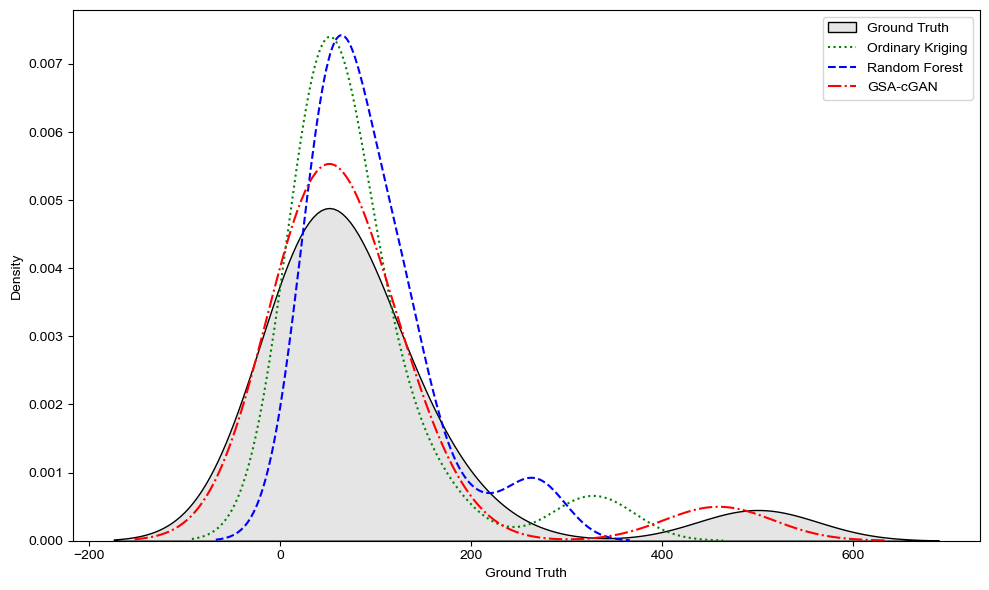

In [7]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data['Ground Truth'], label='Ground Truth', color='black', fill=True, alpha=0.1)
sns.kdeplot(data['Ordinary Kriging'], label='Ordinary Kriging', color='green', linestyle=':')
sns.kdeplot(data['Random Forest'], label='Random Forest', color='blue', linestyle='--')
sns.kdeplot(data['GSA-cGAN'], label='GSA-cGAN', color='red', linestyle='-.')
#plt.title('Pixel Value Distribution Comparison (Test Set)')
plt.legend()
plt.tight_layout()
plt.savefig('Distribution_Comparison.png', dpi=300)
plt.show()